In [975]:
!pip install statsmodels
!pip install scikit-learn



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [976]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [977]:
# read the file
df=pd.read_csv('../Data/basic_dataset.csv')

In [978]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              258 non-null    int64  
 1   Income_k$        258 non-null    int64  
 2   Education_Level  258 non-null    int64  
 3   Spending_Score   258 non-null    float64
 4   Purchased        258 non-null    int64  
 5   Customer_Type    258 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 12.2+ KB


In [979]:
df.head()

,Age,Income_k$,Education_Level,Spending_Score,Purchased,Customer_Type
0,56,56,1,77.218532,0,B
1,46,31,1,58.605438,1,B
2,32,74,1,69.175872,1,B
3,25,32,0,18.430414,0,A
4,38,42,1,49.654097,1,A


In [980]:
# check the null values
df.isnull().sum()

Age                0
Income_k$          0
Education_Level    0
Spending_Score     0
Purchased          0
Customer_Type      0
dtype: int64

## EDA

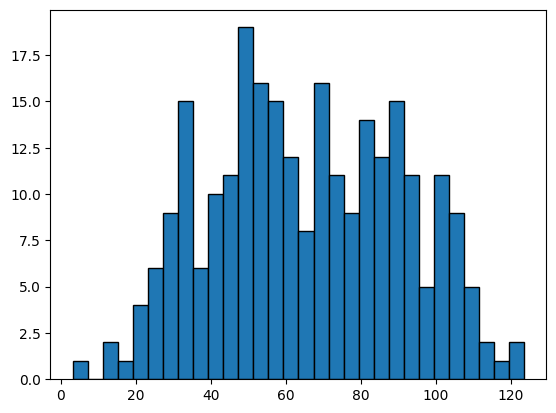

In [981]:
plt.hist(df['Spending_Score'],bins=30,edgecolor='k')
plt.show()

<Axes: xlabel='Age', ylabel='Spending_Score'>

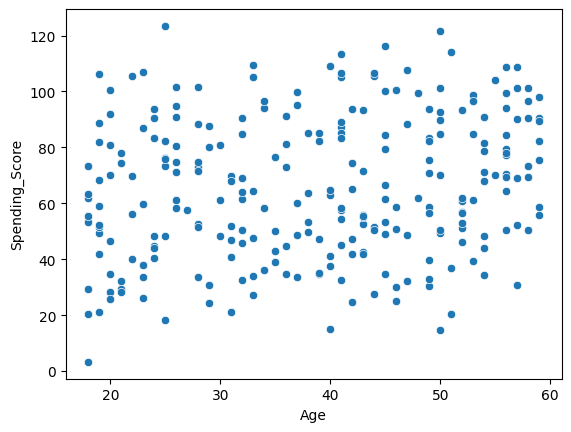

In [982]:
# age vs spending Score
sns.scatterplot(x="Age", y="Spending_Score", data=df)

<Axes: xlabel='Income_k$', ylabel='Spending_Score'>

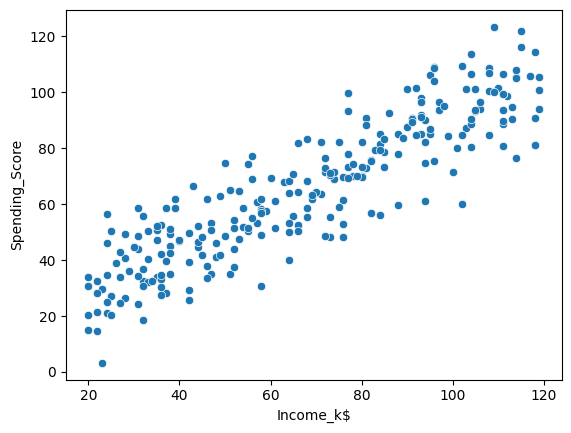

In [983]:
sns.scatterplot(x="Income_k$", y="Spending_Score", data=df)


<Axes: xlabel='Purchased', ylabel='Spending_Score'>

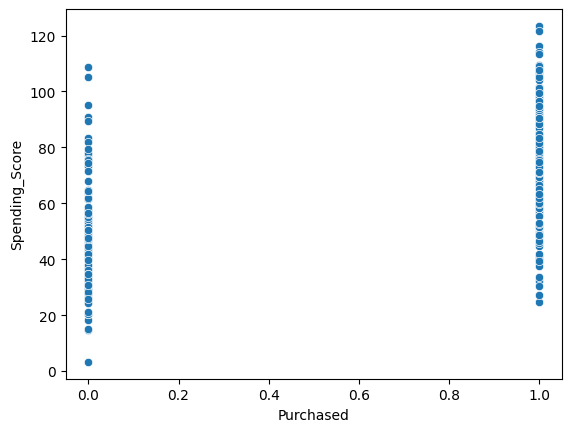

In [984]:
sns.scatterplot(x="Purchased",y="Spending_Score",data=df)

<Axes: xlabel='Education_Level', ylabel='Spending_Score'>

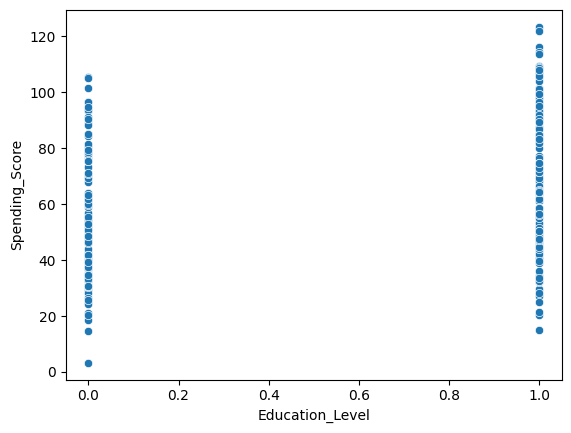

In [985]:
sns.scatterplot(x='Education_Level',y="Spending_Score",data=df)

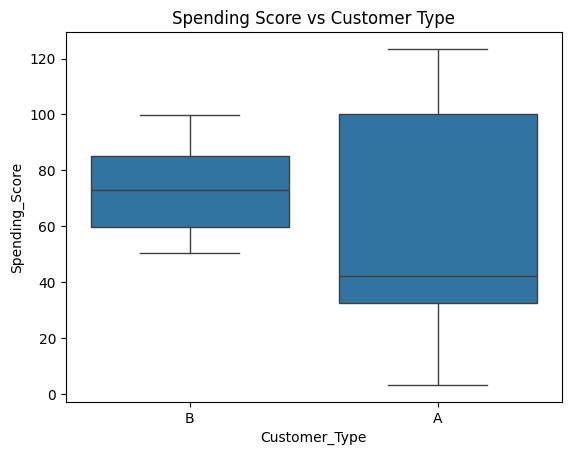

In [986]:
sns.boxplot(x='Customer_Type',y='Spending_Score',data=df)
plt.title("Spending Score vs Customer Type")
plt.show()

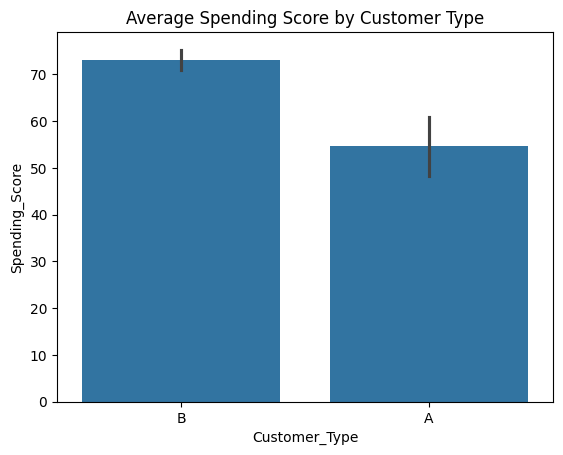

In [987]:
sns.barplot(x="Customer_Type", y="Spending_Score", data=df, estimator="mean")
plt.title("Average Spending Score by Customer Type")
plt.show()

<Axes: >

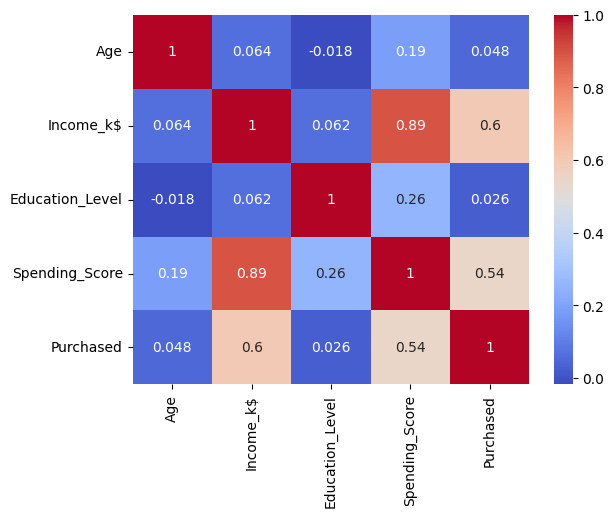

In [988]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True,cmap="coolwarm")

In [989]:
# create dummy for customer type
df_encoded = pd.get_dummies(df, columns=["Customer_Type"],dtype=int, drop_first=True)


In [990]:
df_encoded.head()

,Age,Income_k$,Education_Level,Spending_Score,Purchased,Customer_Type_B
0,56,56,1,77.218532,0,1
1,46,31,1,58.605438,1,1
2,32,74,1,69.175872,1,1
3,25,32,0,18.430414,0,0
4,38,42,1,49.654097,1,0


#### Model Building

In [991]:
df_encoded.shape

(258, 6)

In [992]:
np.random.seed(0)
df_train,df_test=train_test_split(df_encoded,test_size=0.3,random_state=100)

In [993]:
df_train.shape

(180, 6)

In [994]:
df_test.shape


(78, 6)

In [995]:
# create train X and Y
y_train=df_train.pop("Spending_Score")
X_train=df_train

In [996]:
X_train.count()

Age                180
Income_k$          180
Education_Level    180
Purchased          180
Customer_Type_B    180
dtype: int64

In [997]:
# create test X and Y
y_test=df_test.pop('Spending_Score')
X_test=df_test

## Build Model lr_1 using one feature Income_k$

In [998]:

X_train_1 = sm.add_constant(X_train[['Income_k$']])

In [999]:
lr_1=sm.OLS(y_train,X_train_1).fit()

In [1000]:
lr_1.params

const        11.187243
Income_k$     0.797829
dtype: float64

In [1001]:
print(lr_1.summary())


                            OLS Regression Results                            
Dep. Variable:         Spending_Score   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     666.0
Date:                Wed, 03 Sep 2025   Prob (F-statistic):           4.65e-62
Time:                        17:24:04   Log-Likelihood:                -697.80
No. Observations:                 180   AIC:                             1400.
Df Residuals:                     178   BIC:                             1406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1872      2.249      4.975      0.0

#### Prediction on training Data

In [1002]:
y_train_1_pred=lr_1.predict(sm.add_constant(X_train[['Income_k$']]))


### Assumptions of Linear Regression

##### Error Terms are normally Distributed

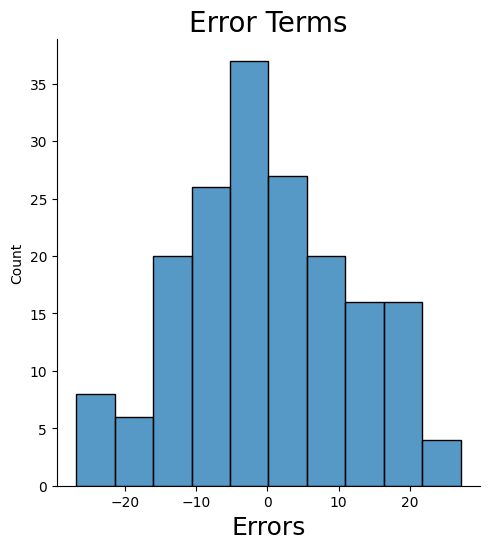

In [1003]:

res=y_train-y_train_1_pred
sns.displot(res)
plt.title('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)
plt.show()

#### Error term having constant variance

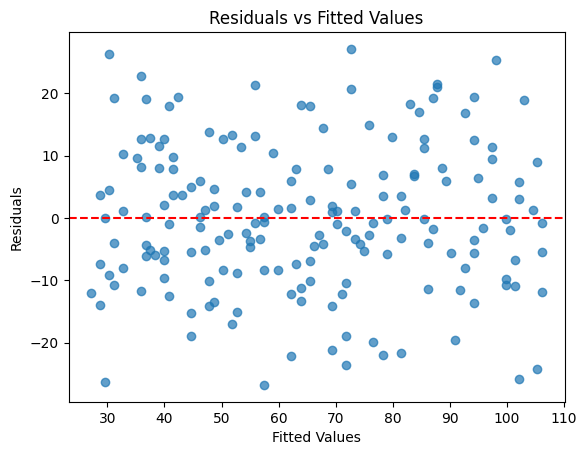

In [1004]:
fitted_values = lr_1.fittedvalues
residuals = lr_1.resid

# --- Plot residuals vs fitted values ---
plt.scatter(fitted_values, residuals, alpha=0.7)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

#### Error Terms are independent of each other

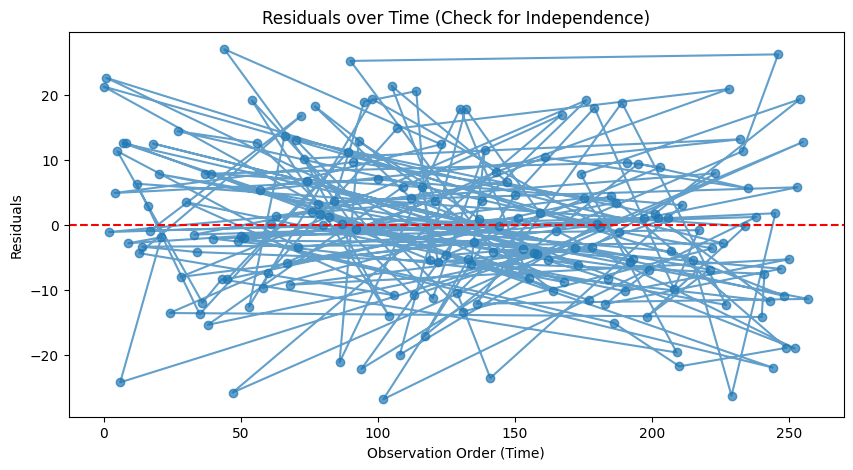

In [1005]:
plt.figure(figsize=(10, 5))
plt.plot(residuals, marker='o', linestyle='-', alpha=0.7)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Observation Order (Time)")
plt.ylabel("Residuals")
plt.title("Residuals over Time (Check for Independence)")
plt.show()

#### Metrics Of Training Data

In [1006]:
# mean of y_train data
train_1_mean=np.mean(y_train)
print(f"Mean value of train data: {train_1_mean}")

Mean value of train data: 64.64620756134603


In [1007]:
# mean squared error of train data
train_1_mse = mean_squared_error(y_train, y_train_1_pred)
print('mean squared error of train data:' ,train_1_mean)


mean squared error of train data: 64.64620756134603


In [1008]:
# root mean squared error of train data
train_1_rmse = np.sqrt(train_1_mse)
print("rmse Score of train data:",train_1_rmse)

rmse Score of train data: 11.678373363097455


In [1009]:
print(f"on average, model lr_1 predictions are off by ~{train_1_rmse:.1f} spending")

on average, model lr_1 predictions are off by ~11.7 spending


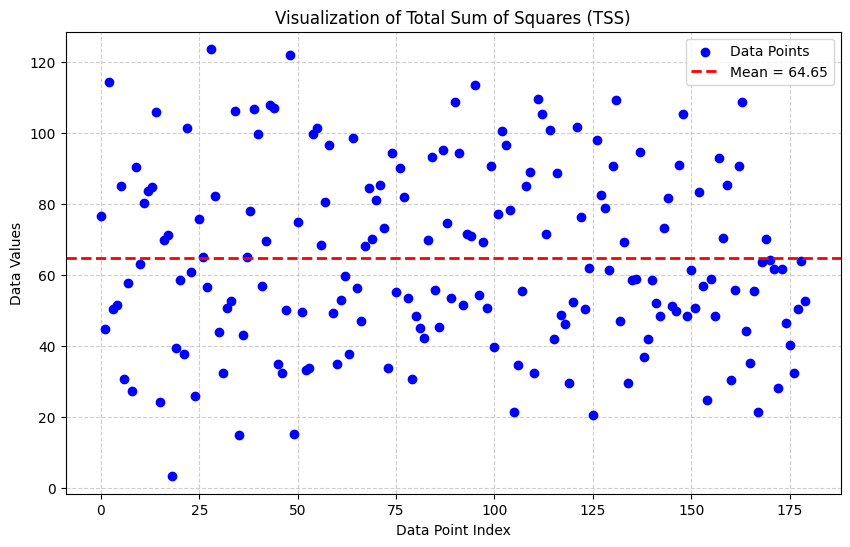

In [1010]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the individual data points as a scatter plot
ax.scatter(range(len(y_train)), y_train, color='blue', label='Data Points', zorder=2)

# Plot a horizontal line at the mean value
ax.axhline(y=train_1_mean, color='red', linestyle='--', linewidth=2, label=f'Mean = {train_1_mean:.2f}')

# Add labels and a title
ax.set_xlabel('Data Point Index')
ax.set_ylabel('Data Values')
ax.set_title('Visualization of Total Sum of Squares (TSS)')

# Set y-axis limits to provide better context
ax.set_ylim(min(y_train) - 5, max(y_train) + 5)

# Add a legend and grid
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)

##### Above plot shows that the data is widely spread from average data point

#### Total Sum of Squares (TSS) / Total Variation  

**Definition:**  
TSS measures how much individual data points (e.g., spendings) vary from their average (mean).  
It shows the overall variability in the data.  

---

#### How it works:  

- We calculate the difference between each data point and the **average value**.  
- Square these differences.  
- Add them all together.  
- The result is the **TSS**.  

---

#### Interpretation  

- **Large Differences = Large TSS**  
  - If the individual spending amounts are very different from the average spending,  
    the TSS will be a **large number**.  
  - This indicates **high variability** (big spread in the data).  

- **Small Differences = Small TSS**  
  - If all the spending amounts are very close to the average,  
    the TSS will be a **small number**.  
  - This indicates **low variability** (data points are very similar).  

---

#### Intuition  

- **High TSS** → People’s spendings vary a lot.  
- **Low TSS** → Everyone spends about the same amount.  


In [1011]:
# total sum of sqaure or total variation
train_1_TSS = np.sum((y_train - train_1_mean)**2)
print("total variation of train data:", train_1_TSS)

total variation of train data: 116407.59262767146


#### Residual Sum of Squares (RSS)  

**Definition:**  
RSS measures the amount of variation in the data that the model **fails to explain**.  
It is the sum of squared differences between the **actual values** and the **predicted values** from the model.  

---

#### Formula  

$$
RSS = \sum (y_i - \hat{y}_i)^2
$$

Where:  
- \(y_i\) = actual value  
- $\hat{y}_i$ = predicted value by the model  

---

#### Interpretation  

- **Small RSS** → Predictions are very close to actual values → model fits well.  
- **Large RSS** → Predictions are far from actual values → model fits poorly.  

---

#### Intuition  

- **Low RSS** → The model captures most of the data’s variation.  
- **High RSS** → The model misses a lot of variation (poor fit).  


In [1012]:
# RSS residual sum of sqaure
train_1_RSS=np.sum((y_train-y_train_1_pred)**2)
print(f"RSS value of train data: {train_1_RSS}")

RSS value of train data: 24549.19279342275


In [1013]:
# R2 score of train data
print("R2 score of train data:",r2_score(y_train, y_train_1_pred))

R2 score of train data: 0.7891100379341827


### Conclusion on Training Data (Using only the feature **Income_k$**)

##### RMSE Interpretation

- The **Root Mean Squared Error (RMSE)** on the training data is **11.6**.  

**Meaning:**  
- On average, model lr_1 predictions on training data differ from the actual values by about **11.6 points**.  
- Example:  
  - If the model lr_1 predicts a **Spending Score = 78** on training data,  
  - The actual score is likely to fall within the range:  

    **78 ± 11.6 → [89.6 , 66.4]**

##### Key Insight 
- A **smaller RMSE** indicates a more accurate model.  

##### R² Interpretation  

- **TSS (Total Sum of Squares / total variation):** `46380.295178138746`  
- **RSS (Residual Sum of Squares / unexplained variation):** `24549.19279342275`    

$$
R^2 = 1 - \frac{RSS}{TSS} = 1 - \frac{24549.19279342275}{116407.59262767146} \approx 0.78
$$


✅ The model lr_1 explains about **78% of the total variation** in the training data.  
❌ About **22% of the variation** is not explained by the model lr_1.  



In [1014]:
y_test_1_pred=lr_1.predict(sm.add_constant(X_test[['Income_k$']]))

#### Metrics of Test Data

In [1015]:
# mean of y_test data
test_1_mean=np.mean(y_test)
print(f"Mean value of test data: {test_1_mean}")

Mean value of test data: 67.9426496847873


In [1016]:
# mean sqaured error of test data
test_1_mse = mean_squared_error(y_test, y_test_1_pred)
print('mean squared error of test data:' ,test_1_mse)

mean squared error of test data: 107.70904718505076


In [1017]:
test_1_rmse = np.sqrt(test_1_mse)
print("RMSE score of test data:",test_1_rmse)

RMSE score of test data: 10.37829693085772


In [1018]:
test_1_TSS = np.sum((y_test - test_1_mean)**2)
print("TSS value of test data:", test_1_TSS)

TSS value of test data: 46380.295178138746


In [1019]:
# RSS residual sum of sqaure
test_1_RSS=np.sum((y_test-y_test_1_pred)**2)
print(f"RSS value of test data: {test_1_RSS}")

RSS value of test data: 8401.30568043396


In [1020]:
# R2 score of Test data
train_1_r2=r2_score(y_test, y_test_1_pred)
print("R2 score of test data:",train_1_r2)

R2 score of test data: 0.8188604525226503


In [1021]:
print(f"model lr_1 was able to explain {train_1_r2*100:.1f}% variation on the test data")

model lr_1 was able to explain 81.9% variation on the test data


#### Conclusion on Test Data (Using only the feature **Income_k$**)

##### RMSE Interpretation

- The **Root Mean Squared Error (RMSE)** on the test data is **11.1**.  

**Meaning:**  
- On average, model lr_1 predictions on test data differ from the actual values by about **11.1 points**.  
- Example:  
  - If the model lr_1 predicts a **Spending Score = 78** on test data,  
  - The actual score is likely to fall within the range:  

    **78 ± 11.1 → [89.1 66.9]**

##### Key Insight 
- A **smaller RMSE** indicates a more accurate model.  

##### R² Interpretation  

- **TSS (Total Sum of Squares / total variation):** `46380.295178138746`  
- **RSS (Residual Sum of Squares / unexplained variation):** `8401.30568043396`   

$$
R^2 = 1 - \frac{RSS}{TSS} = 1 - \frac{8401.30568043396}{46380.295178138746} \approx 0.81
$$


✅ The model lr_1 explains about **81% of the total variation** in the test data.  
❌ About **19% of the variation** is not explained by the model. 


## Build Model lr_2 using VIF

In [1022]:
X_train

,Age,Income_k$,Education_Level,Purchased,Customer_Type_B
37,35,72,1,1,1
191,36,30,1,0,0
203,51,118,1,1,0
125,32,55,0,0,1
153,28,55,1,0,1
...,...,...,...,...,...
94,22,64,0,1,0
138,32,22,1,0,0
176,58,25,1,0,1
79,32,64,0,0,1


#### Perform Variance inflation factor to determine the multicollinearity 

In [1023]:
vif = pd.DataFrame()
X = X_train.drop(columns=['Age','Purchased'])
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Income_k$,3.37
2,Customer_Type_B,2.59
1,Education_Level,2.22


In [1024]:
X_train_2 = sm.add_constant(X_train[vif["Features"]])

In [1025]:
lr_2=sm.OLS(y_train,X_train_2).fit()

In [1026]:
lr_2.params

const               5.578305
Income_k$           0.770978
Customer_Type_B     1.593550
Education_Level    10.898468
dtype: float64

In [1027]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:         Spending_Score   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     296.5
Date:                Wed, 03 Sep 2025   Prob (F-statistic):           1.48e-68
Time:                        17:24:05   Log-Likelihood:                -675.82
No. Observations:                 180   AIC:                             1360.
Df Residuals:                     176   BIC:                             1372.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.5783      2.168     

#### Prediction on Train Data

In [1028]:
y_train_2_pred=lr_2.predict(X_train_2)

#### Error Distribution of Train Data

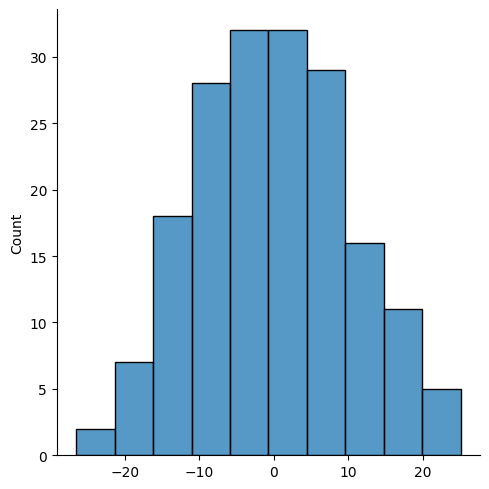

In [1029]:
res=y_train-y_train_2_pred
sns.displot(res)
plt.show()

#### Train Data Metric

In [1030]:
# mean of y_train data
train_2_mean=np.mean(y_train)
print(f"mean value of train data: {train_2_mean}")

mean value of train data: 64.64620756134603


In [1031]:
# mean squared error of train data
train_2_mse=mean_squared_error(y_train,y_train_2_pred)
print(f"mean sqaured error of train data: {train_2_mse}")

mean sqaured error of train data: 106.82607897084084


In [1032]:
# root mean squarede error of train data
train_2_rmse=np.sqrt(train_2_mse)
print(f"root mean squared of train data: {train_2_rmse}")

root mean squared of train data: 10.335670223591736


In [1033]:
print(f"on average, model lr_2 predictions are off by ~{train_2_rmse:.1f} spending on train data")

on average, model lr_2 predictions are off by ~10.3 spending on train data


In [1034]:
# total sum of square or total variation of train data
train_2_TSS=np.sum((y_train-train_2_mean)**2)
print(f"total sum of sqaure or total variation on train data: {train_2_TSS}")

total sum of sqaure or total variation on train data: 116407.59262767146


In [1035]:
# residual sum of square train data
train_2_rss=np.sum((y_train-y_train_2_pred)**2)
print(f"residula sum of square on train data: {train_2_rss}")

residula sum of square on train data: 19228.69421475135


In [1036]:
# r2 score of train data
train_2_r2=r2_score(y_train,y_train_2_pred)
print(f"r2 score of train data: {train_2_r2}")

r2 score of train data: 0.8348158072793916


In [1037]:
print(f"model lr_2 was able to explain {train_2_r2*100:.1f}% variation on the train data")

model lr_2 was able to explain 83.5% variation on the train data


#### Conclusion on Train Data using features [Income_k$,Customer_Type_B,Education_Level,Customer_Type_C]

##### RMSE Interpretation

- The **Root Mean Squared Error (RMSE)** on the training data is **10.3**.  

**Meaning:**  
- On average, model lr_2 predictions on training data differ from the actual values by about **10.3 points**.  
- Example:  
  - If the model lr_2 predicts a **Spending Score = 78** on training data,  
  - The actual score is likely to fall within the range:  

    **78 ± 10.3 → [88.3 , 67.7]**

##### Key Insight 
- A **smaller RMSE** indicates a more accurate model.  

##### R² Interpretation  

- **TSS (Total Sum of Squares / total variation):** `116407.59262767146`  
- **RSS (Residual Sum of Squares / unexplained variation):** `19228.69421475135`  

$$
R^2 = 1 - \frac{RSS}{TSS} = 1 - \frac{19228.69421475135}{116407.59262767146} \approx 0.83
$$


✅ The model lr_2 explains about **83% of the total variation** in the on training data.  
❌ About **17% of the variation** is not explained by the model. 

#### Prediction on Test Data

In [1038]:
X_test_2 = sm.add_constant(X_test[vif["Features"]])

In [1039]:
y_test_2_pred=lr_2.predict(X_test_2)

In [1040]:
# mean of y_test data
test_2_mean=np.mean(y_test)
print(f"mean value of test data: {test_2_mean}")

mean value of test data: 67.9426496847873


In [1041]:
# mean squared error on test data
test_2_mse=mean_squared_error(y_test,y_test_2_pred)
print(f"mean sqaured error of test data: {test_2_mse}")

mean sqaured error of test data: 89.15355088770691


In [1042]:
# root mean squared error on test data
test_2_rmse=np.sqrt(test_2_mse)
print(f"root mean squared error of test data: {test_2_rmse}")

root mean squared error of test data: 9.442115805671254


In [1043]:
print(f"on average, model lr_2 predictions are off by ~{test_2_rmse:.1f} spending on test data")

on average, model lr_2 predictions are off by ~9.4 spending on test data


In [1044]:
# total sum of square or total variation of test data
test_2_TSS=np.sum((y_test-test_2_mean)**2)
print(f"total sum of sqaure or total variation on test data: {test_2_TSS}")

total sum of sqaure or total variation on test data: 46380.295178138746


In [1045]:
# residual sum of square test data
test_2_rss=np.sum((y_test-y_test_2_pred)**2)
print(f"residula sum of square on test data: {test_2_rss}")

residula sum of square on test data: 6953.976969241139


In [1046]:
# r2 score of test data
test_2_r2=r2_score(y_test,y_test_2_pred)
print(f"r2 score of test data: {test_2_r2}")

r2 score of test data: 0.8500661338499009


In [1047]:
print(f"model lr_2 was able to explain {test_2_r2*100:.1f}% variation on the test data")

model lr_2 was able to explain 85.0% variation on the test data


#### Conclusion on Test Data using features [Income_k$,Customer_Type_B,Education_Level,Customer_Type_C]

##### RMSE Interpretation

- The **Root Mean Squared Error (RMSE)** on the test data is **9.4**.  

**Meaning:**  
- On average, model lr_2 predictions on test data differ from the actual values by about **9.4 points**.  
- Example:  
  - If the model lr_2 predicts a **Spending Score = 78** on test data,  
  - The actual score is likely to fall within the range:  

    **78 ± 9.4 → [87.4 , 68.6]**

##### Key Insight 
- A **smaller RMSE** indicates a more accurate model.  

##### R² Interpretation  

- **TSS (Total Sum of Squares / total variation):** `46380.295178138746`  
- **RSS (Residual Sum of Squares / unexplained variation):** `6953.976969241139`  


$$
R^2 = 1 - \frac{RSS}{TSS} = 1 - \frac{6953.976969241139}{46380.295178138746} \approx 0.85
$$


✅ The model lr_2 explains about **85% of the total variation** in the on test data.  
❌ About **15% of the variation** is not explained by the model. 

## Build Model lr_3 all features

In [1048]:
X_train_3=sm.add_constant(X_train)

In [1049]:
lr_3=sm.OLS(y_train,X_train_3).fit()

In [1050]:
lr_3.params

const              -4.922390
Age                 0.292364
Income_k$           0.778201
Education_Level    10.823399
Purchased          -0.565615
Customer_Type_B     0.250685
dtype: float64

In [1051]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:         Spending_Score   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     205.6
Date:                Wed, 03 Sep 2025   Prob (F-statistic):           4.69e-71
Time:                        17:24:05   Log-Likelihood:                -663.94
No. Observations:                 180   AIC:                             1340.
Df Residuals:                     174   BIC:                             1359.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -4.9224      2.945     

#### Prediction on Train data

In [1052]:
y_train_3_pred=lr_3.predict(X_train_3)

### Assumptions of Linear Regression

##### Error Terms are normally Distributed

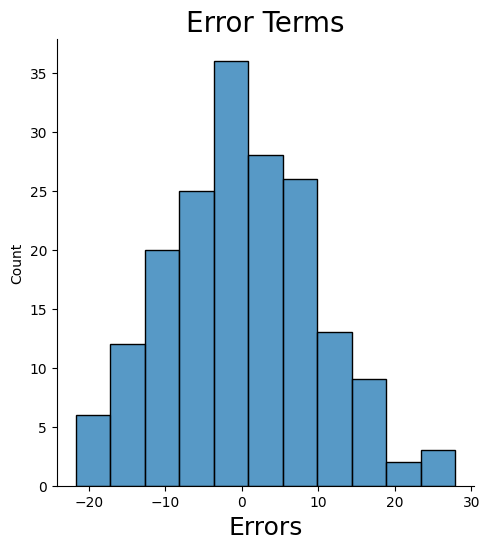

In [1053]:

res=y_train-y_train_3_pred
sns.displot(res)
plt.title('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)
plt.show()


#### Error term having constant variance

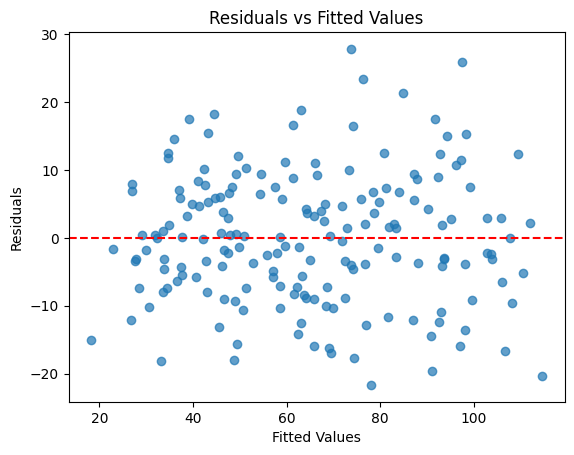

In [1054]:
fitted_values = lr_3.fittedvalues
residuals = lr_3.resid

# --- Plot residuals vs fitted values ---
plt.scatter(fitted_values, residuals, alpha=0.7)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

#### Error Terms are independent of each other

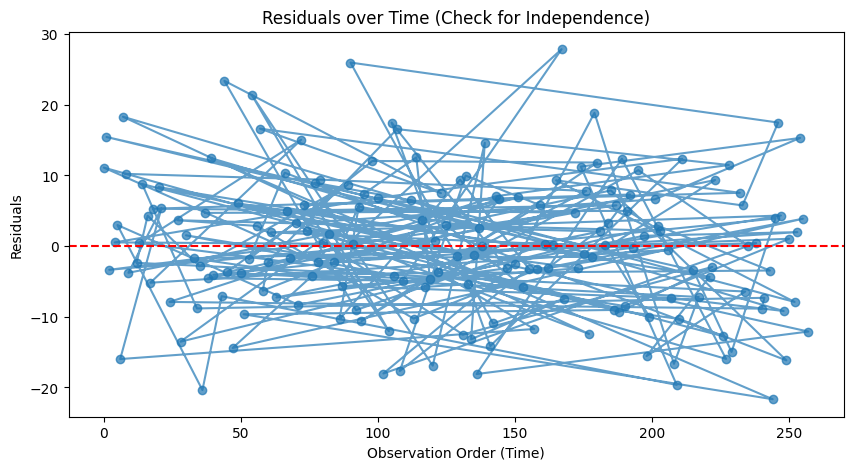

In [1055]:
plt.figure(figsize=(10, 5))
plt.plot(residuals, marker='o', linestyle='-', alpha=0.7)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Observation Order (Time)")
plt.ylabel("Residuals")
plt.title("Residuals over Time (Check for Independence)")
plt.show()

#### Train Data Metric

In [1056]:
# mean of y_train data
train_3_mean=np.mean(y_train)
print(f"mean value of train data: {train_2_mean}")

mean value of train data: 64.64620756134603


In [1057]:
# mean sqaured error of train data
train_3_mse=mean_squared_error(y_train,y_train_3_pred)
print(f"mean sqaured error of train data: {train_3_mse}")

mean sqaured error of train data: 93.6188515178552


In [1058]:
# root mean square error (rmse) of train data
train_3_rmse=np.sqrt(train_3_mse)
print(f"root mean squared of train data: {train_3_rmse}")

root mean squared of train data: 9.675683516829972


In [1059]:
print(f"on average, model lr_2 predictions are off by ~{train_3_rmse:.1f} spending on train data")

on average, model lr_2 predictions are off by ~9.7 spending on train data


In [1060]:
# total sum of square or total variation of train data
train_3_TSS=np.sum((y_train-train_3_mean)**2)
print(f"total sum of sqaure or total variation on train data: {train_3_TSS}")

total sum of sqaure or total variation on train data: 116407.59262767146


In [1061]:
# residual sum of square train data
train_3_rss=np.sum((y_train-y_train_3_pred)**2)
print(f"residula sum of square on train data: {train_3_rss}")

residula sum of square on train data: 16851.393273213936


In [1062]:
# r2 score of train data
train_3_r2=r2_score(y_train,y_train_3_pred)
print(f"r2 score of train data: {train_3_r2}")

r2 score of train data: 0.8552380227713071


In [1063]:
print(f"model lr_2 was able to explain {train_3_r2*100:.1f}% variation on the train data")


model lr_2 was able to explain 85.5% variation on the train data


#### Conclusion on Train Data using all features 

##### RMSE Interpretation

- The **Root Mean Squared Error (RMSE)** on the training data is **9.6**.  

**Meaning:**  
- On average, model lr_3 predictions on training data differ from the actual values by about **9.6 points**.  
- Example:  
  - If the model lr_3 predicts a **Spending Score = 78** on training data,  
  - The actual score is likely to fall within the range:  

    **78 ± 9.6 → [87.6 , 68.4]**

##### Key Insight 
- A **smaller RMSE** indicates a more accurate model.  

##### R² Interpretation  

- **TSS (Total Sum of Squares / total variation):** `116407.59262767146`  
- **RSS (Residual Sum of Squares / unexplained variation):** `16851.393273213936`  

$$
R^2 = 1 - \frac{RSS}{TSS} = 1 - \frac{16851.393273213936}{116407.59262767146} \approx 0.85
$$


✅ The model lr_3 explains about **85% of the total variation** in the on training data.  
❌ About **15% of the variation** is not explained by the model. 

#### Prediction on Test Data

In [1064]:
X_test_3=sm.add_constant(X_test)

In [1065]:
y_test_3_pred=lr_3.predict(X_test_3)

In [1066]:
# mean of y_test data
test_3_mean=np.mean(y_test)
print(f"mean value of test data: {test_3_mean}")

mean value of test data: 67.9426496847873


In [1067]:
# mean squared error on test data
test_3_mse=mean_squared_error(y_test,y_test_3_pred)
print(f"mean sqaured error of test data: {test_3_mse}")

mean sqaured error of test data: 85.15374596895414


In [1068]:
# root mean squared error on test data
test_3_rmse=np.sqrt(test_3_mse)
print(f"root mean squared error of test data: {test_3_rmse}")

root mean squared error of test data: 9.227878736142676


In [1069]:
print(f"on average, model lr_3 predictions are off by ~{test_3_rmse:.1f} spending on test data")

on average, model lr_3 predictions are off by ~9.2 spending on test data


In [1070]:
# total sum of square or total variation of test data
test_3_TSS=np.sum((y_test-test_3_mean)**2)
print(f"total sum of sqaure or total variation on test data: {test_3_TSS}")

total sum of sqaure or total variation on test data: 46380.295178138746


In [1071]:
# residual sum of square test data
test_3_rss=np.sum((y_test-y_test_3_pred)**2)
print(f"residula sum of square on test data: {test_3_rss}")

residula sum of square on test data: 6641.992185578423


In [1072]:
# r2 score of test data
test_3_r2=r2_score(y_test,y_test_3_pred)
print(f"r2 score of test data: {test_3_r2}")

r2 score of test data: 0.8567928004755538


In [1073]:
print(f"model lr_3 was able to explain {test_3_r2*100:.1f}% variation on the test data")

model lr_3 was able to explain 85.7% variation on the test data


#### Conclusion on Test Data using all features

##### RMSE Interpretation

- The **Root Mean Squared Error (RMSE)** on the test data is **9.2**.  

**Meaning:**  
- On average, model lr_3 predictions on test data differ from the actual values by about **9.2 points**.  
- Example:  
  - If the model lr_3 predicts a **Spending Score = 78** on test data,  
  - The actual score is likely to fall within the range:  

    **78 ± 9.2 → [87.2 , 68.4]**

##### Key Insight 
- A **smaller RMSE** indicates a more accurate model.  

##### R² Interpretation  

- **TSS (Total Sum of Squares / total variation):** `46380.295178138746`  
- **RSS (Residual Sum of Squares / unexplained variation):** `6641.992185578423`  


$$
R^2 = 1 - \frac{RSS}{TSS} = 1 - \frac{6641.992185578423}{46380.295178138746} \approx 0.85
$$


✅ The model lr_3 explains about **85% of the total variation** in the on test data.  
❌ About **15% of the variation** is not explained by the model. 